<a href="https://colab.research.google.com/github/LeonidGrekhov/CMPE297Section1FinalProject/blob/main/craigslistAds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6.441666666666666
https://raleigh.craigslist.org/search/cta?s=0&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
5.441666666666666
https://raleigh.craigslist.org/search/cta?s=120&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
4.441666666666666
https://raleigh.craigslist.org/search/cta?s=240&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
3.4416666666666664
https://raleigh.craigslist.org/search/cta?s=360&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
2.4416666666666664
https://raleigh.craigslist.org/search/cta?s=480&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
1.4416666666666664
https://raleigh.craigslist.org/search/cta?s=600&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
0.44166666666666643
https://raleigh.craigslist.org/search/cta?s=720&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
0.20833333333333334
https://boone.craigslist.org/search/cta

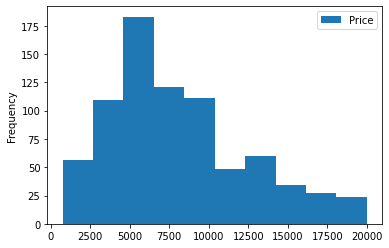

Boone


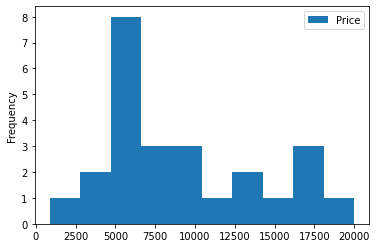

In [ ]:
from bs4 import BeautifulSoup #web scraping
import requests #http requests
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np


def craigs_list(locations, min_price, max_price, min_year, max_year):
    
    dfs = []
    master = []

    for location in locations:
        
        s = 0
        ##https://raleigh.craigslist.org/search/cta?s=0&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
        ##https://sfbay.craigslist.org/search/cta?hasPic=1#search=1~gallery~0~0
        url = "https://"+ str(location) + ".craigslist.org/search/cta?s=" + str(s) + "&min_price=" + str(min_price) + "&max_price=" + str(max_price) + "&min_auto_year=" + str(min_year) +"&max_auto_year=" + str(max_year)
        r  = requests.get(url)
        html_page = r.text
        soup = BeautifulSoup(html_page, "lxml")
        total = str(soup.findAll("span", {"class": "totalcount"})[0].contents)[2:-2]
        count = int(total)/120
        
        while(count > 0):
            print(count)
            url = "https://"+ str(location) + ".craigslist.org/search/cta?s=" + str(s) + "&min_price=" + str(min_price) + "&max_price=" + str(max_price) + "&min_auto_year=" + str(min_year) +"&max_auto_year=" + str(max_year)
            print(url)
            r  = requests.get(url)
            html_page = r.text
            soup = BeautifulSoup(html_page, "lxml")
            
            values = add_to_df(soup)
            s = s + 120
            count = count - 1


            craig_df = pd.DataFrame(np.column_stack([values[0], values[1], values[2],values[3], values[4]]),
                columns = ["Price", "Location","Title","Link", "Date"])
            craig_df = craig_df.dropna()
           
            dfs.append(craig_df)
        
            craig_df = 0
            
        #concat all dfs here
        d = pd.concat(dfs)
        master.append(d)
        d=[]
        dfs = []

    
    return master
    
	
	
def graph_cars(df):
    df2 = df.iloc[:, :2].copy()
    df2['Price'] = df2['Price'].str[1:]
    df2['Price'] = df2['Price'].str.replace(',', '').astype(int)
    df2.plot(kind='hist', y = "Price")
    plt.show()
	
	
def add_to_df(soup):
    link_list = []
    listing_price = []
    prices = []
    hoods = []
    titles = []
    make_model = []
    year = []
    miles = []
    odometer = []
    date = []
    
   
 
    for car in soup.find_all('li', class_= 'result-row'):
            
        try:
            location = str(car.find(class_ = "result-hood").contents)
            hoods.append(location[4:-3])
        except:
            hoods.append('N/A')
                
        try:
            prices.append(car.find(class_ = "result-price").contents)
        except:
            #not possible
            prices.append('N/A')
                
        try:
            titles.append(car.find(class_ = "result-title hdrlnk").contents)
        except:
            titles.append('N/A')
                
        try:
            date.append(car.find(class_ = "result-date").contents)
        except:
            date.append('N/A')
                   
        
    for car in soup.findAll("a", {"class": "result-title hdrlnk"}):
        link_list.append(car['href'])
        
    return [prices, hoods, titles,link_list, date]
	
	
	
locations = ["raleigh", "boone"]
min_price = 500
max_price= 20000
min_year = 2000
max_year = 2010
df = craigs_list(locations, min_price, max_price, min_year, max_year)
	
	
print("Raleigh")
graph_cars(df[0])
print("Boone")
graph_cars(df[1])


# Description Data Frame
# Addition: Car model, Vin, Condition, drive, fuel, odometer, title status, transmission, type